# Import Module

In [1]:
# !pip install nltk
# !pip install textblob 
# !pip install tweepy
# !pip install re

In [2]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to C:\Users\Triano
[nltk_data]     Nurhikmat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**SOURCE** :  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python)

# SECTION A : Data Preparation

## Step A.1. Getting the authentication credentials

In [5]:
# initialize api instance
consumer_key = 'cYo1ZjVZtWujP5mJd56Ej6oPc'
consumer_secret = 'SyCp8W7yOi30NasRv7hFSQwI10ts1Df9NW5hDbGSsrhqqIhXkM'
access_token = '1294698007-hkhnPycvlvwA5TqUfFCz64DM5yFCoRxJqarZKFU'
access_token_secret = 'V3vgOUJD5SjGlxyl6qzbQUvpqoNcB40oGYBtFHkAKV4wX'

#Authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

## Step A.2. Getting a Dataset from twitter

In [8]:
#get tweet 
tweets = tp.Cursor(api.search,q="#ONEPIECE955",lang="en").items(500)
result = []
for tweet in  tweets :
    result.append(tweet)

## Step A.3 Extract Tweet to pandas dataframe

In [9]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [10]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1174584821827293184,#OdaIsTeasingAgain we want one more chapter ou...,2019-09-19 07:23:38,0,aakaash5555,22,,"[{'text': 'OdaIsTeasingAgain', 'indices': [0, ..."
1,1174583961986584577,RT @JoyBoyTheories: --------BIG NEWS SPOILER--...,2019-09-19 07:20:13,5,apsvvs,198,lost in the sauce,"[{'text': 'ONEPIECE955', 'indices': [92, 104]}]"
2,1174583710341091328,RT @JoyBoyTheories: --------BIG NEWS SPOILER--...,2019-09-19 07:19:13,5,IRelicym,189,"Toronto, ON","[{'text': 'ONEPIECE955', 'indices': [92, 104]}]"
3,1174579926311346176,RT @JoyBoyTheories: --------BIG NEWS SPOILER--...,2019-09-19 07:04:11,5,Lingception,89,"Conroe, Texas","[{'text': 'ONEPIECE955', 'indices': [92, 104]}]"
4,1174579072581722112,RT @westernsenpai: I have NEVER seen an indivi...,2019-09-19 07:00:48,624,TheMikkelator,243,,[]


In [11]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [12]:
len(dataframe)

213

# Section B : Data Preprocessing

## Step B.1. Basic Text Pre-processing 

### 1. Lower casing

In [13]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    rt @noxdraz: one piece chapter 955 review! enj...
1    rt @animationmanga: a little animation of luff...
2    rt @revujo: king of hell, enma w/@joyboytheori...
3    sanji’s reaction when zoro cut the cliff inste...
4    i think this is clarely a big reveal!!! zoroju...
Name: text, dtype: object

### 2. Punctuation removal

In [14]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,rt noxdraz one piece chapter 955 review enjoy ...
1,rt animationmanga a little animation of luffy ...
2,rt revujo king of hell enma wjoyboytheories on...
3,sanjis reaction when zoro cut the cliff instea...
4,i think this is clarely a big reveal zorojuros...


### 3. Stopwords removal

In [9]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    rt young___benz major platform young benz whip...
1    rt realest101__ oda really feeding zoro stans ...
2    damnit onepiece955 damm awesome enma closure a...
3    rt leekyxiv droped another youtube video onepi...
4    season animememes animeart bleach naruto onepi...
5    rt joyboytheories told yall 40 minutes got bur...
6    rt luffysredhawk reveal backstory fuckersss on...
7    onepiece955 luffy audience training im loving ...
8    rt anaallii love law traitor yall turning yall...
9    ive absent crazy couple chapters heres catch r...
Name: text, dtype: object

### 4. Frequent words removal

In [15]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

onepiece955    166
the            121
rt              99
is              72
i               57
a               52
to              50
and             44
this            39
zoro            39
dtype: int64

In [16]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    noxdraz one piece chapter 955 review enjoy san...
1    animationmanga little animation of luffy from ...
2    revujo king of hell enma wjoyboytheories enma ...
3    sanjis reaction when cut cliff instead of tree...
4    think clarely big reveal zorojuros daddy was f...
Name: text, dtype: object

### 5. Rare words removal

In [17]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

watching              1
httpstcolstczgz4cy    1
anyway                1
could                 1
percakapan            1
jelllyfishjam         1
phenomenal            1
kaimaxz               1
creator               1
ashes                 1
dtype: int64

In [18]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    noxdraz one piece chapter 955 review enjoy san...
1    animationmanga little animation of luffy from ...
2    revujo king of hell enma wjoyboytheories enma ...
3    sanjis reaction when cut cliff instead of tree...
4    think clarely big reveal zorojuros daddy was f...
Name: text, dtype: object

### 6. Spelling correction

In [19]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    noxdraz one piece chapter 955 review enjoy san...
1    animationmanga little animation of puffy from ...
2    revujo king of hell emma wjoyboytheories emma ...
3    sans reaction when cut cliff instead of tree h...
4    think clearly big reveal zorojuros daddy was f...
Name: text, dtype: object

### 7. Tokenization

In [15]:
TextBlob(dataframe['text'][1]).words

WordList(['realest101', 'oda', 'really', 'feeding', 'stans', 'theories', 'talking', 'httpstcojfmrb29xn8'])

### 8. Stemming

In [20]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [22]:
dataframe.head()

,text
0,noxdraz one piec chapter 955 review enjoy sand...
1,animationmanga littl anim of luffi from manga ...
2,revujo king of hell enma wjoyboytheori enma ht...
3,sanji reaction when cut cliff instead of tree ...
4,think clare big reveal zorojuro daddi wa from ...


### 9. Lematization

In [23]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    noxdraz one piec chapter 955 review enjoy sand...
1    animationmanga littl anim of luffi from manga ...
2    revujo king of hell enma wjoyboytheori enma ht...
3    sanji reaction when cut cliff instead of tree ...
4    think clare big reveal zorojuro daddi wa from ...
Name: text, dtype: object

In [24]:
dataframe.head()

,text
0,noxdraz one piec chapter 955 review enjoy sand...
1,animationmanga littl anim of luffi from manga ...
2,revujo king of hell enma wjoyboytheori enma ht...
3,sanji reaction when cut cliff instead of tree ...
4,think clare big reveal zorojuro daddi wa from ...


# SECTION C : Data Exploration

## Step C.1. Basic feature extraction 

### 1. Number of words

In [25]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,noxdraz one piec chapter 955 review enjoy sand...,14
1,animationmanga littl anim of luffi from manga ...,11
2,revujo king of hell enma wjoyboytheori enma ht...,8
3,sanji reaction when cut cliff instead of tree ...,9
4,think clare big reveal zorojuro daddi wa from ...,12


### 2. Number of characters

In [26]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,noxdraz one piec chapter 955 review enjoy sand...,14,125
1,animationmanga littl anim of luffi from manga ...,11,91
2,revujo king of hell enma wjoyboytheori enma ht...,8,62
3,sanji reaction when cut cliff instead of tree ...,9,64
4,think clare big reveal zorojuro daddi wa from ...,12,79


### 3. Number of stopwords

In [27]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,noxdraz one piec chapter 955 review enjoy sand...,14,125,0
1,animationmanga littl anim of luffi from manga ...,11,91,2
2,revujo king of hell enma wjoyboytheori enma ht...,8,62,1
3,sanji reaction when cut cliff instead of tree ...,9,64,2
4,think clare big reveal zorojuro daddi wa from ...,12,79,2


### 3. Number of special characters

In [28]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,noxdraz one piec chapter 955 review enjoy sand...,14,125,0,0
1,animationmanga littl anim of luffi from manga ...,11,91,2,0
2,revujo king of hell enma wjoyboytheori enma ht...,8,62,1,0
3,sanji reaction when cut cliff instead of tree ...,9,64,2,0
4,think clare big reveal zorojuro daddi wa from ...,12,79,2,0


## Step C.2.  Labeling Using Polarity (Textblob)

### 1. New Dataframe

In [29]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

### 2. Labeling 

In [30]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

c:\users\triano nurhikmat\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
c:\users\triano nurhikmat\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\triano nurhikmat\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\users\triano nurhikmat\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [31]:
new_df = new_df[['text','sentiment','sentimentclass']]

In [32]:
new_df

,text,sentiment,sentimentclass
0,noxdraz one piec chapter 955 review enjoy sand...,0.400000,Positive
1,animationmanga littl anim of luffi from manga ...,0.000000,Netral
2,revujo king of hell enma wjoyboytheori enma ht...,0.000000,Netral
3,sanji reaction when cut cliff instead of tree ...,0.000000,Netral
4,think clare big reveal zorojuro daddi wa from ...,0.000000,Netral
5,ichsanist guy just got new sword it alreadi tr...,0.136364,Positive
6,wa fire no doubt plz goda give u these two at ...,0.000000,Netral
7,wow it moment for,0.100000,Positive
8,gunnbab credit seneto99 httpstcojviddh1yv2,0.000000,Netral
9,ttvsavvysix damn who go reset bl3 come grind w...,0.000000,Netral


### 3. Aggregation Sentimentclass

In [33]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,120,0.563380
1,Negative,29,0.136150
2,Positive,64,0.300469


### 4. Visualization 

#### 4.1. Barchart

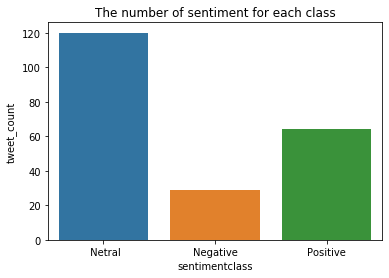

In [34]:
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

#### 4.2. Pie Chart

(-1.1210334685525307,
 1.3193819582651973,
 -1.1075449796995964,
 1.1094921598561367)

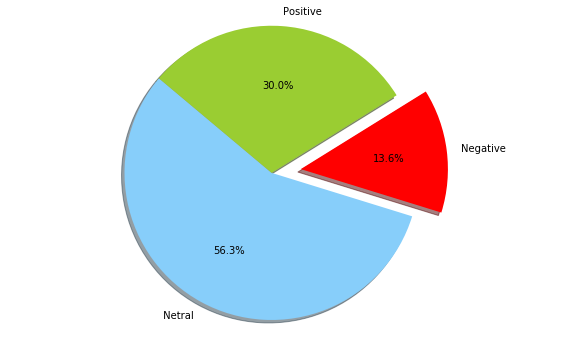

In [35]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

In [ ]:
#make wordclud 